# Milestone Project 1: Food Vision Big

## Check GPU

* A100![2024-01-31 (1).png](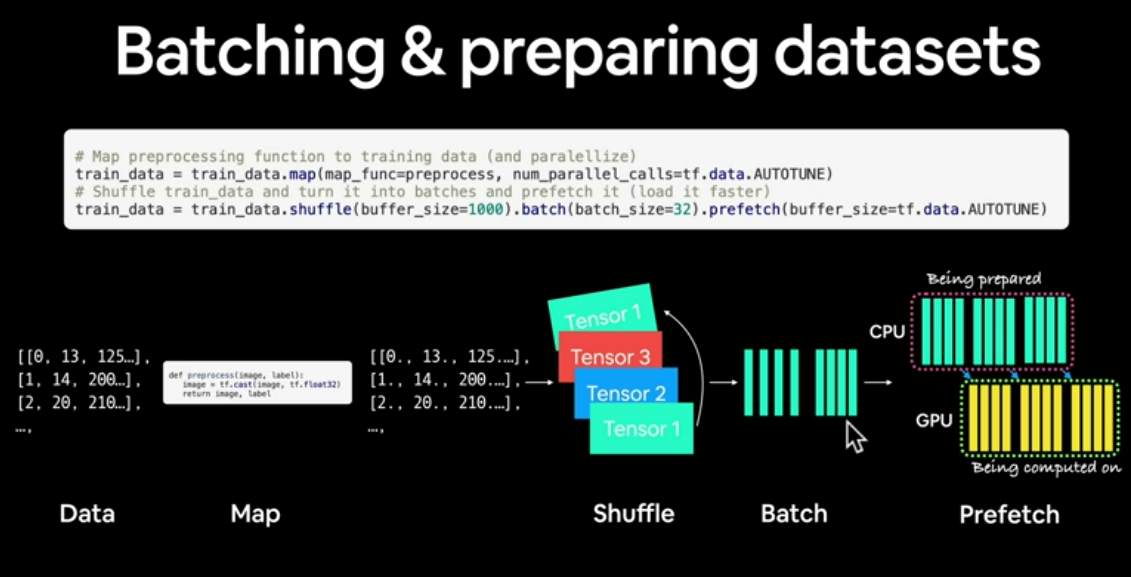![2024-01-31 (1).png](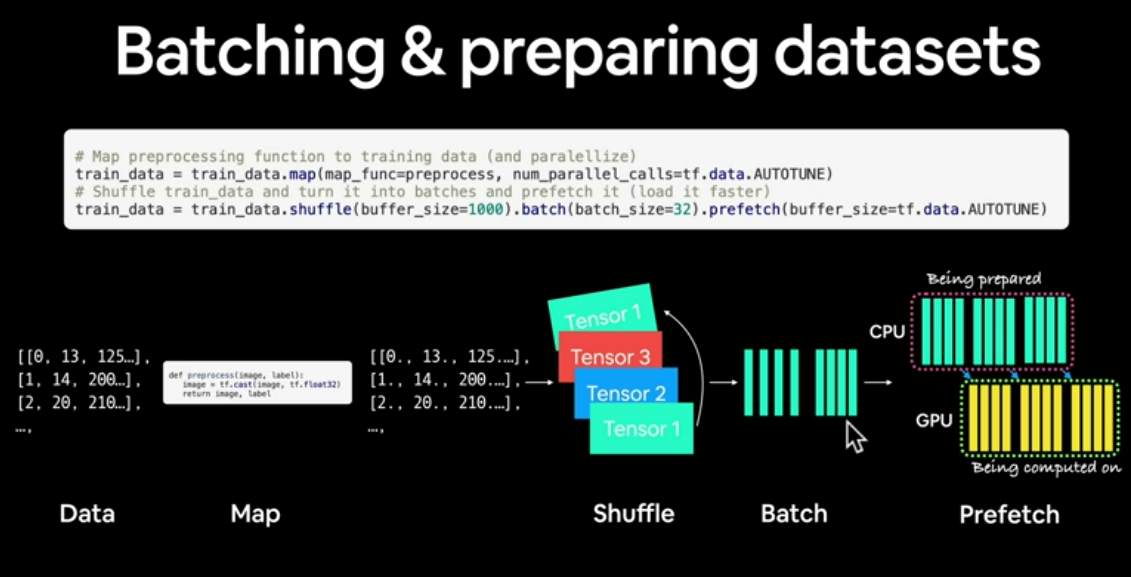![2024-01-31 (3).png](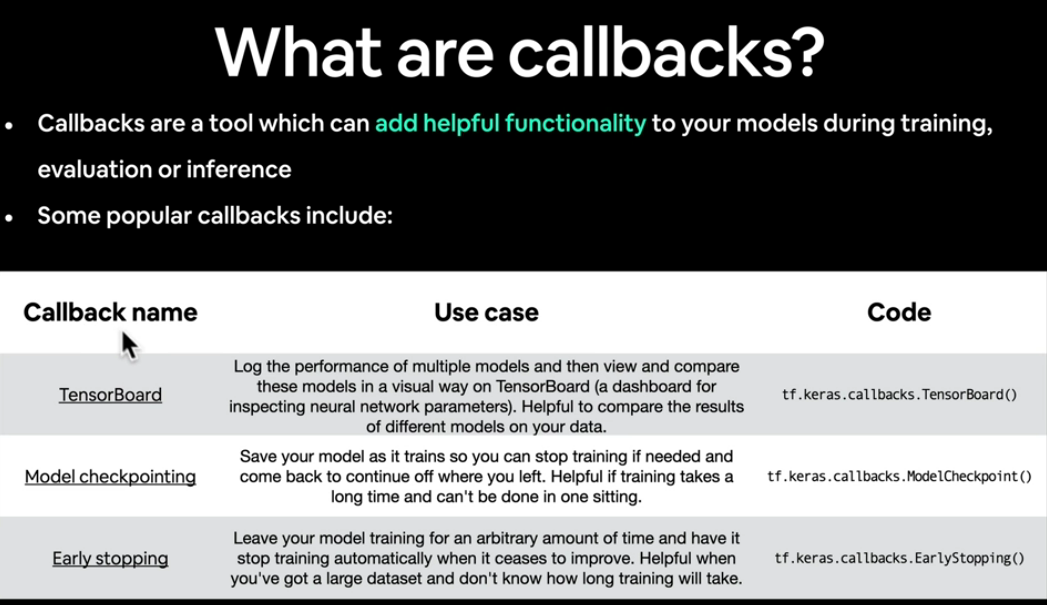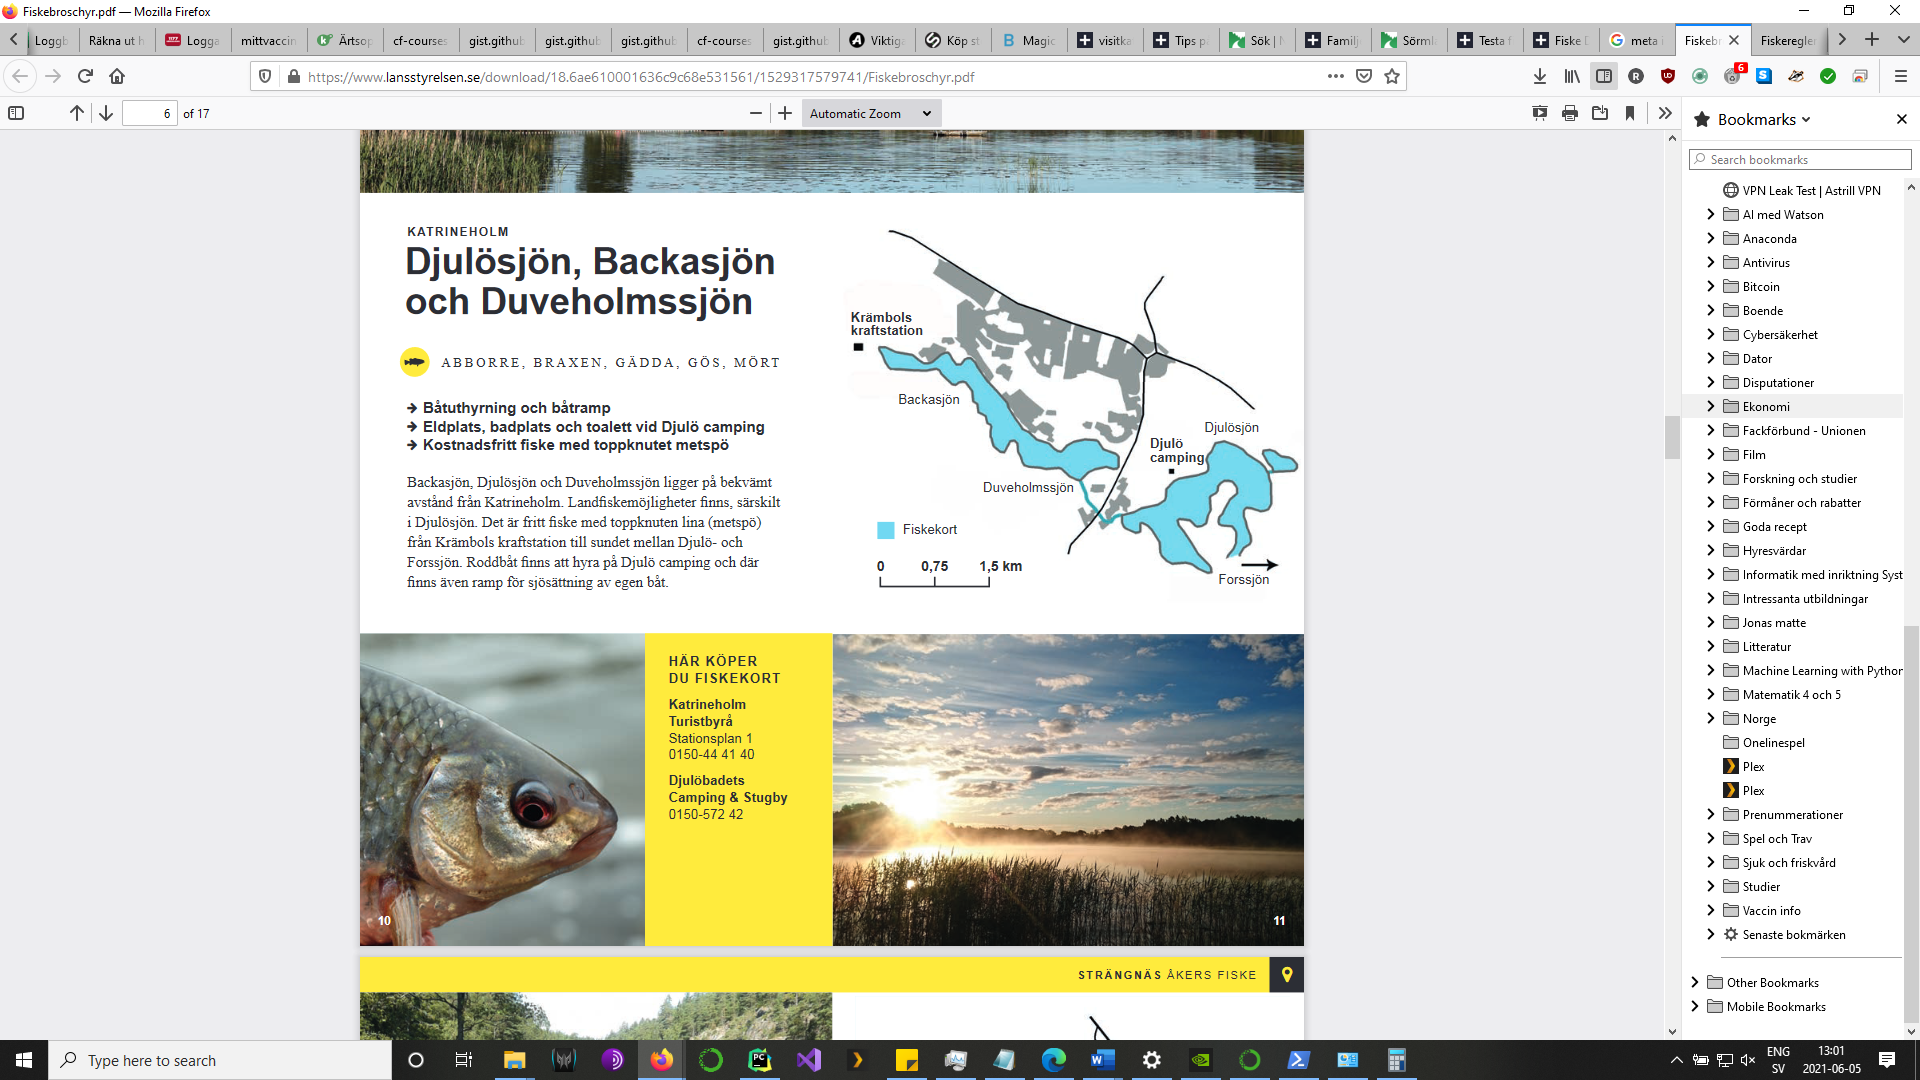)))
* T4
* V100


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9f2aca8d-c6f4-828f-153d-6486bf3eb635)


In [3]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py



--2024-02-03 01:03:24--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-02-03 01:03:25 (115 MB/s) - ‘helper.py’ saved [13380/13380]



In [4]:
# Import series of helper functions
from helper import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow datasets to download data

If you want to get an overwiev of TensorFlow Datasets (TFDS), read the [guide](https://www.tensorflow.org/datasets/overview)

In [5]:
# Get TensorFllow Datasets
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders() # Get all available datasets in TFDS
print('food101' in datasets_list)

True


In [6]:
# Load in the food101 (takes 5-6 minutes)
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                                    shuffle_files=True,
                                                    as_supervised=True, # Data gets returned in tuple format (data, label)
                                                    with_info=True) # Downloads the metadata aswell (ds_info makes it possible)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete0KETN0/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete0KETN0/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our inut data
* What the labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the labels match p with the class names?

In [7]:
# Fetures of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
# Take one sample of the training data
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
# Output info about our trainig sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 49
  Class name (str form): grilled_cheese_sandwich
  


In [11]:
# What does our image tensor from TFDS's Food101 loo like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[239, 217, 157],
        [244, 222, 162],
        [247, 227, 168],
        ...,
        [119, 104,  73],
        [111,  95,  70],
        [105,  89,  66]],

       [[233, 212, 149],
        [239, 218, 155],
        [243, 223, 162],
        ...,
        [117, 102,  71],
        [108,  92,  67],
        [101,  85,  62]],

       [[227, 206, 139],
        [234, 213, 146],
        [238, 219, 153],
        ...,
        [117, 100,  70],
        [108,  91,  65],
        [101,  83,  59]],

       ...,

       [[ 35,   7,  19],
        [ 35,   7,  19],
        [ 36,   8,  20],
        ...,
        [198, 181, 127],
        [196, 179, 125],
        [193, 176, 122]],

       [[ 34,   6,  18],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [200, 183, 129],
        [201, 184, 130],
        [198, 181, 127]],

       [[ 33,   5,  17],
        [ 34,   6,  18],
        [ 35,   7,  19],
        ...,
        [203, 186, 13

In [12]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow datasets

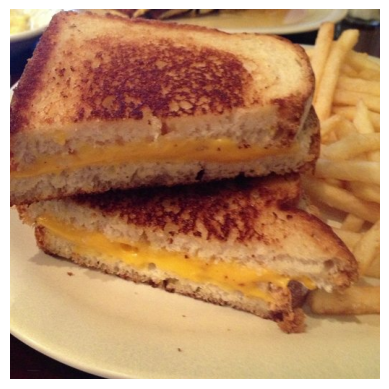

In [13]:
# Plot an image tensor
import matplotlib.pyplot as plt
# Convert the TensorFlow image tensor to NumPy array
image_np = image.numpy()
# Display the image using Matplotlib
plt.imshow(image_np)
plt.axis('off') # Optional: Turn off axis labels
plt.show()

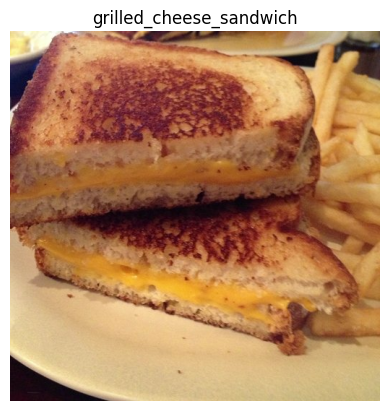

In [14]:
plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is assosciated with the right image
plt.axis(False);

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With thes points in mind, we've got a few things we can tackle with a preprocessing function.

In [15]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224): # Since its a tuple we need image, label
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) #reshape target image
  image = image /255.0 # Rescale image to the range [0, 1]
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


In [16]:
# Preprocess a single sampple image and check the outputs
preprocessed_img = preprocess_img(image, label)[0] # [0] for the 0th index of the tuple we're returning
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[239 217 157]
  [244 222 162]
  [247 227 168]
  ...
  [119 104  73]
  [111  95  70]
  [105  89  66]]

 [[233 212 149]
  [239 218 155]
  [243 223 162]
  ...
  [117 102  71]
  [108  92  67]
  [101  85  62]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[0.9363545  0.85260105 0.6097439 ]
  [0.9523009  0.87386954 0.6374549 ]
  [0.94453776 0.86356544 0.64397764]
  ...
  [0.51484567 0.4638653  0.29717883]
  [0.485814   0.43063188 0.2944976 ]
  [0.41842645 0.35568136 0.26044354]]

 [[0.91044414 0.83173263 0.5544218 ]
  [0.9367147  0.86220485 0.592457  ]
  [0.9409564  0.8670068  0.6112645 ]
  ...
  [0.4999999  0.44117638 0.27871156]
  [0.48093206 0.4179068  0.2856941 ]
  [0.41502517 0.3469578  0.24779843]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


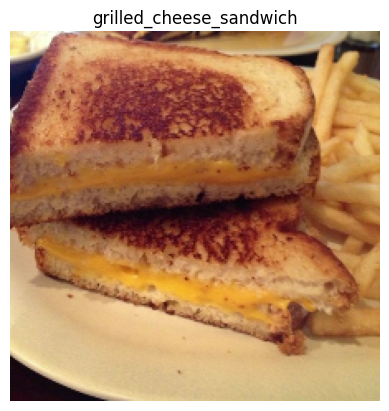

In [17]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img)
plt.title(class_names[label])
plt.axis(False);

## Batch & prepare datasets

We're now going to make our data input pipeline run really fast.

More [resources](https://www.tensorflow.org/guide/data_performance) on this.

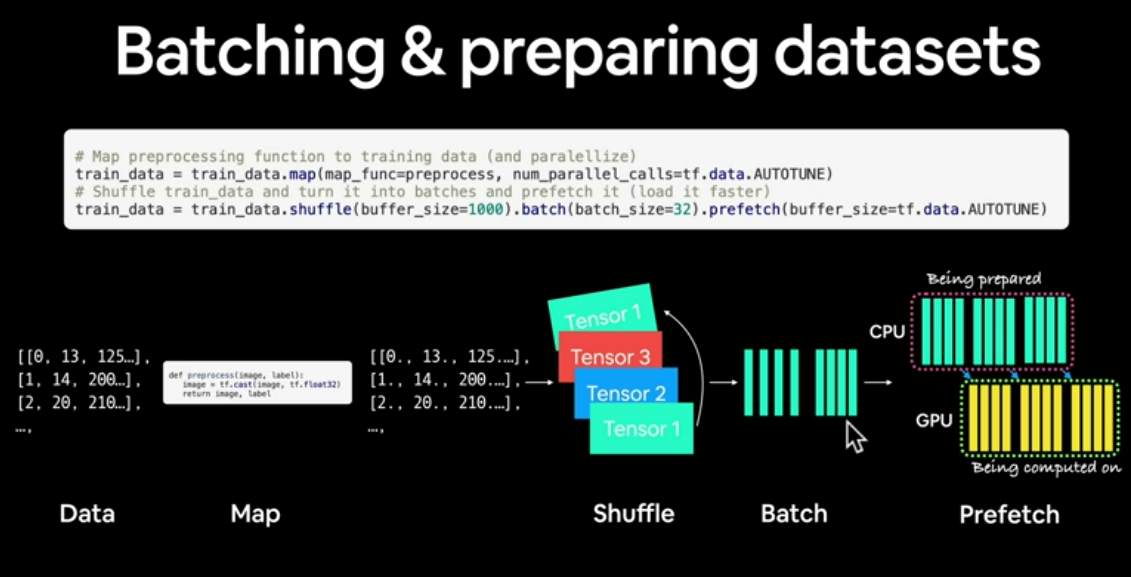

In [18]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE) # Autotune uses two chips, faster
# Shuffle train data and turn into batches and prefetch it (load faster)
train_data = train_data.shuffle(buffer_size=len(train_data)).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # Shuffle is how many elements to shuffle at a single time (1000 if memory not enough)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE).cache()



In [19]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a coupe of callbacks to help us while our model trains:
* `TensorBoard` callbacks to log training results (so we can visualize them later if need be)
* `ModelCheckpoint` callback to save our model's progress after feature extraction

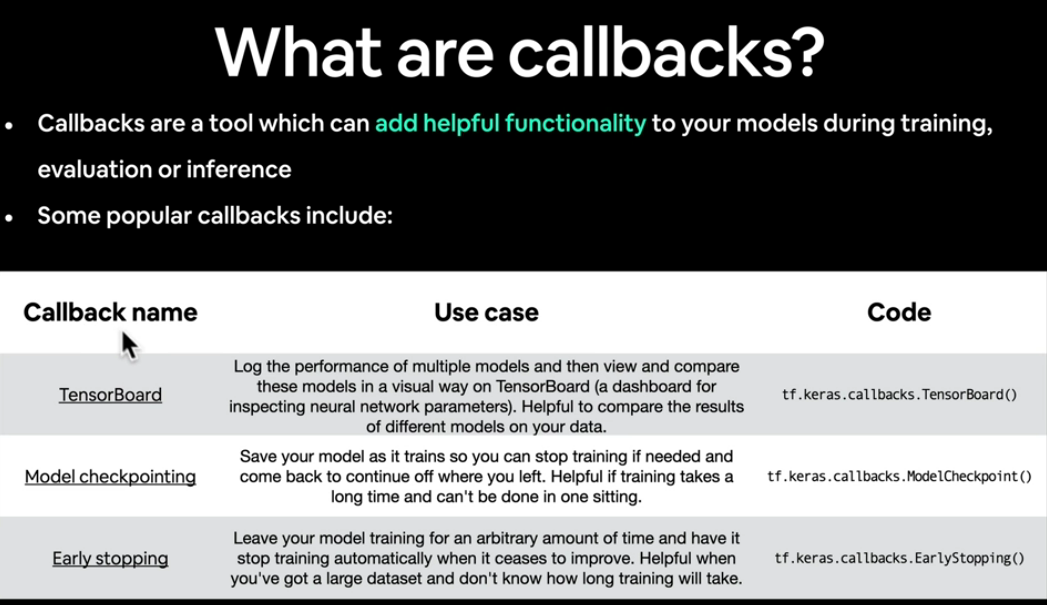

In [20]:
# Create tensorbord callback (import from helper.py)
from helper import create_tensorboard_callback

# Create a ModelCheckpoit callback to save a model's progress during training
checkpoint_path = "model_checkpoints/checkPoint.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=2) # Outputs information, 0=none, 1=little info, 2=most info

## Setup mixed precision training

For deeper undestanding, [TensorFlow Guide](https://www.tensorflow.org/guide/mixed_precision)

Mixed precision utilizes a combination of `float32` and `float16` data types to speed up model performance.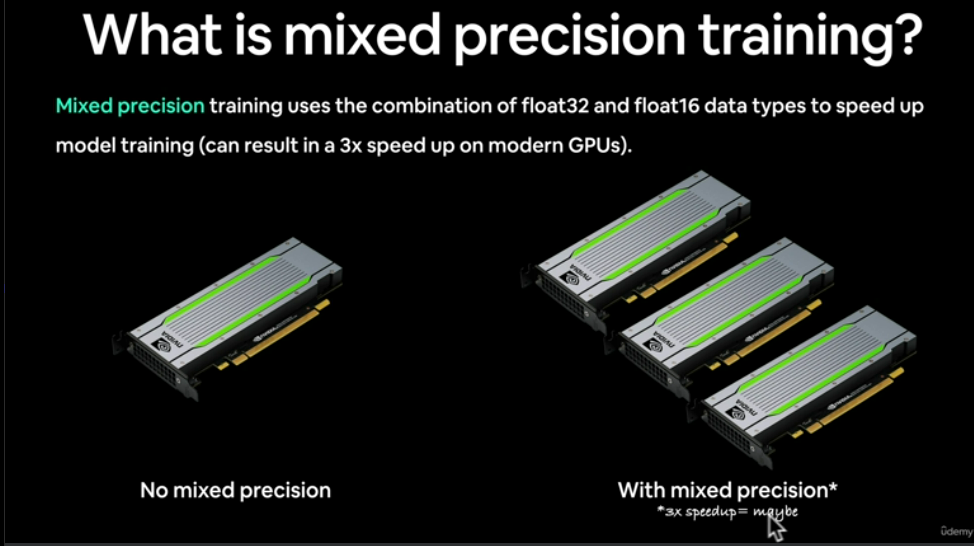

In [21]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16') # Set global data polict to mixed percision
mixed_precision

<module 'keras.api._v2.keras.mixed_precision' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/mixed_precision/__init__.py'>

In [22]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9f2aca8d-c6f4-828f-153d-6486bf3eb635)


## Build feature extraction model

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB7(include_top=False) # Downloads the pretrained weights
base_model.trainable = False # Froze the layers

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficienetNetBX models have rescaling built-in if your model doesn't you can have a layer like below
# x = preprocessing.rescaling(1./255)(x)
x = base_model(inputs, training=False) # Makes sure layers wich should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use spares_categorical_crossentropy when labels
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

258076736/258076736 [==============================] - 12s 0us/step


In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               258661    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

## Checking layer dtype policies (are we using mixed precision?)

In [27]:
for layer in model.layers:
    print(layer.name, layer.dtype, layer.trainable, layer.dtype_policy)

input_layer float32 True <Policy "float32">
efficientnetb7 float32 False <Policy "mixed_float16">
global_average_pooling2d float32 True <Policy "mixed_float16">
dense float32 True <Policy "mixed_float16">
softmax_float32 float32 True <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of particular layer
* `layer.trainable`: is the layer trainable or not? (If `False`, the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with

In [28]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <Polic

In [29]:
mixed_precision.global_policy()

<Policy "mixed_float16">